Introdução: Porta Divisora de Feixe (Beam Splitter - BSgate)

Este exemplo demonstra como uma porta divisora de feixe (beam splitter) mistura dois modos ópticos.

Vamos preparar dois estados coerentes e observar a distribuição de seus números médios de fótons após a passagem pela porta.


Conceito:

Um BSgate atua como um divisor de feixe físico, onde a luz incidente em duas entradas é misturada e emerge em duas saídas, com suas amplitudes complexas sendo transformadas linearmente.


In [3]:
try:
    import pennylane as qml
    from pennylane import numpy as np
    import matplotlib.pyplot as plt

    print("Strawberryfields já está instalado.")
except ImportError:
    print("Strawberryfields não está instalado. Iniciando a instalação...")

    ! pip install pennylane

    import pennylane as qml

    print("PennyLane instalado com sucesso.")

from pennylane import numpy as np
import matplotlib.pyplot as plt




Strawberryfields já está instalado.


In [4]:
# Dispositivo para estados Gaussianos (eficiente para operações de CV)
# O backend 'strawberryfields.gaussian' utiliza o motor do Strawberry Fields
# para simular estados Gaussianos.
#dev = qml.device("strawberryfields.gaussian", wires=2)
dev = qml.device("default.gaussian", wires=2)

@qml.qnode(dev)
def beam_splitter_circuit_pl(theta, phi, alpha0, alpha1):
    # Prepara estados coerentes nos modos 0 e 1 usando qml.Displacement
    # alpha é a amplitude de deslocamento. O segundo parâmetro é o ângulo de fase.
    qml.Displacement(alpha0, phi, wires=0) # Implement displacement using PennyLane
    # Mede o número médio de fótons em cada modo de saída
    return qml.expval(qml.QuadX(0))


@qml.qnode(dev)
def beam_splitter_circuit_pl_0(theta, phi, alpha0, alpha1):
    # Prepara estados coerentes nos modos 0 e 1 usando qml.Displacement
    # alpha é a amplitude de deslocamento. O segundo parâmetro é o ângulo de fase.
    qml.Displacement(alpha0, phi, wires=0)
    qml.Displacement(alpha1, phi, wires=1)
    qml.CoherentState(alpha1, phi, wires = 1)  # Prepare coherent as second qumode
    # Aplica a porta Beamsplitter
    qml.Beamsplitter(theta, phi, wires=[0, 1])

    # Mede o número médio de fótons em cada modo de saída
    #return qml.expval(qml.NumberOperator(0)), qml.expval(qml.NumberOperator(1))
    return qml.expval(qml.NumberOperator(0))

@qml.qnode(dev)
def beam_splitter_circuit_pl_1(theta, phi, alpha0, alpha1):
    # Prepara estados coerentes nos modos 0 e 1 usando qml.Displacement
    # alpha é a amplitude de deslocamento. O segundo parâmetro é o ângulo de fase.
    qml.Displacement(alpha0, phi, wires=0)
    qml.Displacement(alpha1, phi, wires=1)
    qml.CoherentState(alpha1, phi, wires = 1)  # Prepare coherent as second qumode

    # Aplica a porta Beamsplitter
    qml.Beamsplitter(theta, phi, wires=[0, 1])

    # Mede o número médio de fótons em cada modo de saída
    #return qml.expval(qml.NumberOperator(0)), qml.expval(qml.NumberOperator(1))
    return qml.expval(qml.NumberOperator(1))


In [5]:
# Parâmetros para o circuito
theta_val = np.pi / 4 # Ângulo que define um divisor de feixe 50/50
phi_val = 0.0       # Fase relativa
alpha0_val = 1.0    # Amplitude de deslocamento para o modo 0
alpha1_val = 0.5    # Amplitude de deslocamento para o modo 1

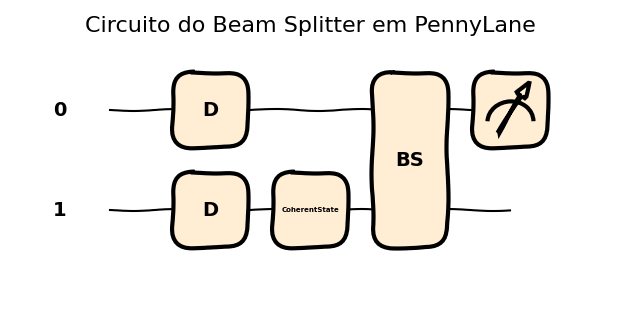

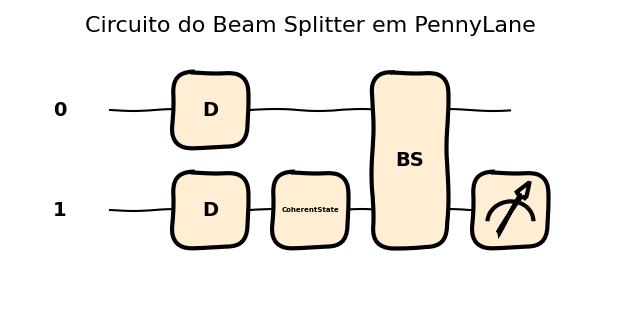

In [6]:
# Desenho do Circuito
fig, ax = qml.draw_mpl(beam_splitter_circuit_pl_0, style="sketch")(theta_val, phi_val, alpha0_val, alpha1_val)
fig.suptitle("Circuito do Beam Splitter em PennyLane", fontsize=16)
plt.show()

# Desenho do Circuito
fig, ax = qml.draw_mpl(beam_splitter_circuit_pl_1, style="sketch")(theta_val, phi_val, alpha0_val, alpha1_val)
fig.suptitle("Circuito do Beam Splitter em PennyLane", fontsize=16)
plt.show()

In [7]:
# Executa o circuito
mean = beam_splitter_circuit_pl(theta_val, phi_val, alpha0_val, alpha1_val)
mean_n0 = beam_splitter_circuit_pl_0(theta_val, phi_val, alpha0_val, alpha1_val)
mean_n1 = beam_splitter_circuit_pl_1(theta_val, phi_val, alpha0_val, alpha1_val)


print(f"Número médio de fótons no Modo 0 após BS: {mean_n0:.2f}")
print(f"Número médio de fótons no Modo 1 após BS: {mean_n1:.2f}")



Número médio de fótons no Modo 0 após BS: 0.12
Número médio de fótons no Modo 1 após BS: 1.12


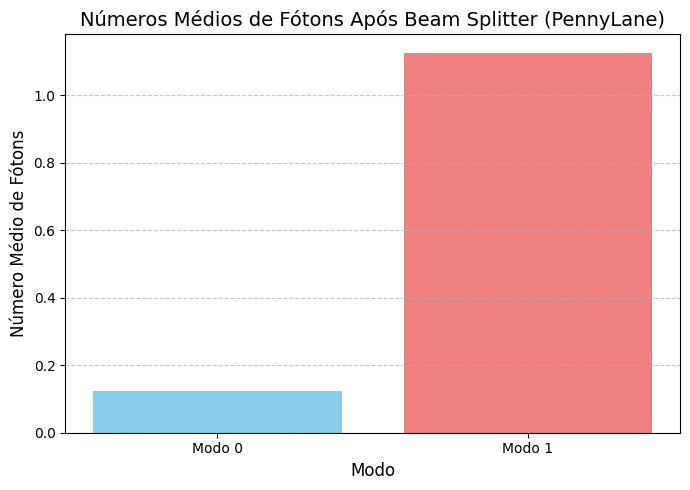

In [8]:
# Visualização dos Resultados (Gráfico de Barras)
modes = ['Modo 0', 'Modo 1']
photon_numbers = [mean_n0, mean_n1]

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(modes, photon_numbers, color=['skyblue', 'lightcoral'])
ax.set_title('Números Médios de Fótons Após Beam Splitter (PennyLane)', fontsize=14)
ax.set_xlabel('Modo', fontsize=12)
ax.set_ylabel('Número Médio de Fótons', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [9]:
print(
    "Expectation value of x-quadrature after displacement: {}\n".format(mean)
)

print("Expected current in each detector:")
print("Detector 1: {}".format(mean_n0))
print("Detector 2: {}".format(mean_n1))
print(
    "Difference between currents: {}".format(
       mean_n1 - mean_n0
    )
)

Expectation value of x-quadrature after displacement: 2.0

Expected current in each detector:
Detector 1: 0.125
Detector 2: 1.1249999999999998
Difference between currents: 0.9999999999999998
